In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [2]:
# cols = ['target', 'is_business', 'product_type', 'county', 'is_consumption',
#        'day_no', 'hour', 'month', 'weekday',
#        '10_metre_u_wind_component', '10_metre_v_wind_component',
#        'cloudcover_high_x', 'cloudcover_low_x', 'cloudcover_mid_x',
#        'cloudcover_total_x', 'dewpoint_x',
#        'direct_solar_radiation_x', 
#        'latitude_x', 'longitude_x', 'snowfall_x',
#        'surface_solar_radiation_downwards', 'temperature_x',
#        'total_precipitation', 'lowest_price_per_mwh',
#        'highest_price_per_mwh', 
#        'euros_per_mwh', 'cloudcover_high_y', 'cloudcover_low_y', 'cloudcover_mid_y',
#        'cloudcover_total_y', 'dewpoint_y',
#        'diffuse_radiation', 'direct_solar_radiation_y',
#        'rain', 'shortwave_radiation', 'snowfall_y',
#        'surface_pressure', 'temperature_y', 'winddirection_10m',
#        'windspeed_10m']
cols = ['target', 'is_business', 'product_type', 'county', 'is_consumption',
       'hour', 'weekday', 'day_no', 'month',
       'cloudcover_total_x', 'dewpoint_x',
       'latitude_x', 'longitude_x',
       'euros_per_mwh', 'cloudcover_low_y', 
       'cloudcover_total_y',
       'diffuse_radiation', 'direct_solar_radiation_y',
       'rain', 'shortwave_radiation',
       'surface_pressure', 'temperature_y', 'winddirection_10m',
       'windspeed_10m']

In [3]:
train = pd.read_csv('output/updated_train.csv')

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_regression
sample_size = 10000
X, y = train[cols[1:]][:sample_size], train['target'][:sample_size]
X = PolynomialFeatures(3).fit_transform(X)
# x = sm.add_constant(X)

# data = pd.DataFrame()
# data['features'] = X.columns
# data['VIF'] = [variance_inflation_factor(X.values, i).round(1) for i in range(X.shape[1])]
# f_scores, p_scores = f_regression(X, y)
# data['Fscores'] = f_scores
# data['Pscores'] = p_scores.round(5)
# data

In [5]:
X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, test_size=.2, random_state=0)
X_train, X_valid, y_train, y_valid =  train_test_split(X_train_and_validate, y_train_and_validate, test_size=.25, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.score(X_train, y_train)

0.7151842539870313

In [6]:
y_predict_train = linreg.predict(X_train)
y_predict_valid = linreg.predict(X_valid)
print('MAE: training set')
print(mean_absolute_error(y_predict_train, y_train))
print('MAE: validation set')
print(mean_absolute_error(y_predict_valid, y_valid))

MAE: training set
208.08961121117463
MAE: validation set
315.74252113525773


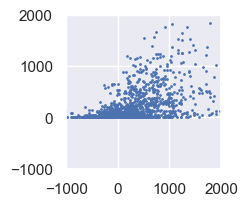

In [7]:
plt.figure(figsize=(2, 2))
plt.xlim(-1000, 2000)
plt.ylim(-1000, 2000)
plt.scatter(y_predict_valid, y_valid, s=1, alpha=1);

In [8]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1)
model.fit(X_train, y_train)
model.score(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_valid = model.predict(X_valid)
print('MAE: training set')
print(mean_absolute_error(y_predict_train, y_train))
print('MAE: validation set')
print(mean_absolute_error(y_predict_valid, y_valid))

MAE: training set
212.34957443553253
MAE: validation set
306.28683005896073


In [7]:
sample_size = 10000
X, y = train[cols[1:]][:sample_size], train['target'][:sample_size]
X = StandardScaler().fit_transform(X)
X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, test_size=.2, random_state=0)
X_train, X_valid, y_train, y_valid =  train_test_split(X_train_and_validate, y_train_and_validate, test_size=.25, random_state=0)


In [8]:
from sklearn.svm import SVR

model = SVR(kernel='poly', degree=3, C=.1, gamma=1)
model.fit(X_train, y_train)
model.score(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_valid = model.predict(X_valid)
print('MAE: training set')
print(mean_absolute_error(y_predict_train, y_train))
print('MAE: validation set')
print(mean_absolute_error(y_predict_valid, y_valid))

MAE: training set
164.62492262446744
MAE: validation set
190.22557578801334


In [8]:
from sklearn.model_selection import GridSearchCV

params = {'kernel': ['linear','poly', 'rbf'], 
          'degree': [2, 3],
          'C': [.1, 1],
          'gamma': [.1, 1]}
model = SVR()
gs = GridSearchCV(estimator=model, 
                           param_grid=params,
                           scoring='neg_mean_absolute_error',
                           verbose=2,
                           cv=3)
gs.fit(X_train_and_validate, y_train_and_validate)
results = gs.cv_results_
print('Best Score:', gs.best_score_, 'Best Params:', gs.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END ..........C=0.1, degree=2, gamma=0.1, kernel=linear; total time=   3.0s
[CV] END ..........C=0.1, degree=2, gamma=0.1, kernel=linear; total time=   2.8s
[CV] END ..........C=0.1, degree=2, gamma=0.1, kernel=linear; total time=   2.2s
[CV] END ............C=0.1, degree=2, gamma=0.1, kernel=poly; total time=   2.5s
[CV] END ............C=0.1, degree=2, gamma=0.1, kernel=poly; total time=   2.5s
[CV] END ............C=0.1, degree=2, gamma=0.1, kernel=poly; total time=   2.6s
[CV] END .............C=0.1, degree=2, gamma=0.1, kernel=rbf; total time=   5.1s
[CV] END .............C=0.1, degree=2, gamma=0.1, kernel=rbf; total time=   5.0s
[CV] END .............C=0.1, degree=2, gamma=0.1, kernel=rbf; total time=   4.9s
[CV] END ............C=0.1, degree=2, gamma=1, kernel=linear; total time=   2.4s
[CV] END ............C=0.1, degree=2, gamma=1, kernel=linear; total time=   2.3s
[CV] END ............C=0.1, degree=2, gamma=1, k

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

params = {'max_depth': [15], 
          'min_samples_leaf': [3, 4],
         'n_estimators': [200, 250, 300]}
model = RandomForestRegressor()
gs = GridSearchCV(estimator=model, 
                           param_grid=params,
                           scoring='neg_mean_absolute_error',
                           verbose=2,
                           cv=3)
gs.fit(X_train_and_validate, y_train_and_validate)
results = gs.cv_results_
print('Best Score:', gs.best_score_, 'Best Params:', gs.best_params_)

In [4]:
sample_size = train.shape[0]
X, y = train[cols[1:]][:sample_size], train['target'][:sample_size]
X = StandardScaler().fit_transform(X)
X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, test_size=.2, random_state=0)
X_train, X_valid, y_train, y_valid =  train_test_split(X_train_and_validate, y_train_and_validate, test_size=.25, random_state=0)

model = RandomForestRegressor(max_depth=15, min_samples_leaf=3, n_estimators=50)
model.fit(X_train, y_train)
model.score(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_valid = model.predict(X_valid)
print('MAE: training set')
print(mean_absolute_error(y_predict_train, y_train))
print('MAE: validation set')
print(mean_absolute_error(y_predict_valid, y_valid))

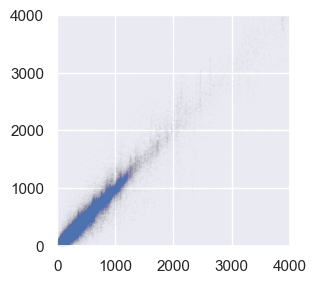

In [22]:
plt.figure(figsize=(3, 3))
plt.xlim(0, 4000)
plt.ylim(0, 4000)
plt.scatter(y_predict_valid, y_valid, s=1, alpha=.003);

In [27]:
import warnings

warnings.filterwarnings('ignore')

from xgboost import XGBRegressor

params = {'max_depth': [10, 15], 
          'gamma': [1, 10],
         'n_estimators': [100]}
model = XGBRegressor()
gs = GridSearchCV(estimator=model, 
                           param_grid=params,
                           scoring='neg_mean_absolute_error',
                           verbose=2,
                           cv=3)
gs.fit(X_train_and_validate[:10000], y_train_and_validate[:10000])
results = gs.cv_results_
print('Best Score:', gs.best_score_, 'Best Params:', gs.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ............gamma=1, max_depth=10, n_estimators=100; total time=   2.0s
[CV] END ............gamma=1, max_depth=10, n_estimators=100; total time=   2.0s
[CV] END ............gamma=1, max_depth=10, n_estimators=100; total time=   1.9s
[CV] END ............gamma=1, max_depth=15, n_estimators=100; total time=   2.3s
[CV] END ............gamma=1, max_depth=15, n_estimators=100; total time=   2.4s
[CV] END ............gamma=1, max_depth=15, n_estimators=100; total time=   2.5s
[CV] END ...........gamma=10, max_depth=10, n_estimators=100; total time=   1.6s
[CV] END ...........gamma=10, max_depth=10, n_estimators=100; total time=   1.6s
[CV] END ...........gamma=10, max_depth=10, n_estimators=100; total time=   1.6s
[CV] END ...........gamma=10, max_depth=15, n_estimators=100; total time=   1.9s
[CV] END ...........gamma=10, max_depth=15, n_estimators=100; total time=   2.1s
[CV] END ...........gamma=10, max_depth=15, n_est

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [2, 3, 5, 10, 15, 20, 50]}
model = KNeighborsRegressor()
gs = GridSearchCV(estimator=model, 
                           param_grid=params,
                           scoring='neg_mean_absolute_error',
                           verbose=2,
                           cv=3)
gs.fit(X_train_and_validate[:100000], y_train_and_validate[:100000])
results = gs.cv_results_
print('Best Score:', gs.best_score_, 'Best Params:', gs.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] END ......................................n_neighbors=2; total time=   8.5s
[CV] END ......................................n_neighbors=2; total time=   9.3s
[CV] END ......................................n_neighbors=2; total time=   9.5s
[CV] END ......................................n_neighbors=3; total time=   9.8s
[CV] END ......................................n_neighbors=3; total time=  10.2s
[CV] END ......................................n_neighbors=3; total time=  10.3s
[CV] END ......................................n_neighbors=5; total time=  10.5s
[CV] END ......................................n_neighbors=5; total time=  10.7s
[CV] END ......................................n_neighbors=5; total time=  10.4s
[CV] END .....................................n_neighbors=10; total time=  16.7s
[CV] END .....................................n_neighbors=10; total time=  18.1s
[CV] END .....................................n_n